In [1]:
import os
import numpy as np
import pandas as pd

# Dataset per speech

## Loading the cleaned data

In [2]:
speeches1 = pd.read_parquet("https://github.com/Mlad-en/Intro_Data_Science/raw/main/cleaned_data/combined_data_2013_2023.parquet")

In [3]:
speeches1

,country_name,iso_3,Region,corruption_sources,year,corruption_scores,corruption_standard_errors,global_score,fos_yearly_evolution,text
0,Afghanistan,AFG,AP,3.0,2013,8.0,3.0,62.64,0.00,I bring to all warm \ngreetings and the good w...
1,Norway,NOR,None,NaN,2023,NaN,NaN,95.18,3.18,None
2,Afghanistan,AFG,AP,4.0,2014,12.0,4.0,62.93,0.29,It gives me \ngreat pleasure to express my sin...
3,Norway,NOR,WE/EU,7.0,2022,84.0,7.0,92.00,-1.28,We live in challenging times indeed. As a glob...
4,Ireland,IRL,None,NaN,2023,NaN,NaN,89.91,1.91,None
...,...,...,...,...,...,...,...,...,...,...
1937,Zambia,ZMB,SSA,9.0,2017,37.0,9.0,63.52,-1.40,Let me join previous speakers in congratulatin...
1938,Zambia,ZMB,SSA,9.0,2018,35.0,9.0,64.64,1.12,Let me join other world leaders in con...
1939,Zambia,ZMB,SSA,9.0,2019,34.0,9.0,63.62,-1.02,Let me join previous speakers in congratulatin...
1940,Zambia,ZMB,SSA,9.0,2020,33.0,9.0,63.00,-0.62,"Your excellency Mr. Volkan Bozkir, President o..."


## Add codes data set for regions

In [4]:
df_codes = pd.read_csv('UNSD — Methodology.csv', sep=";")

In [5]:
df_codes = df_codes[['Region Name', 'Sub-region Name', 'ISO-alpha3 Code' ]].rename(columns={'ISO-alpha3 Code':'iso_3'})

In [6]:
df_codes

,Region Name,Sub-region Name,iso_3
0,Africa,Northern Africa,DZA
1,Africa,Northern Africa,EGY
2,Africa,Northern Africa,LBY
3,Africa,Northern Africa,MAR
4,Africa,Northern Africa,SDN
...,...,...,...
243,Oceania,Polynesia,WSM
244,Oceania,Polynesia,TKL
245,Oceania,Polynesia,TON
246,Oceania,Polynesia,TUV


In [7]:
df1 =  pd.merge(df_codes, speeches1, how="right", on="iso_3") 

In [8]:
df1

,Region Name,Sub-region Name,iso_3,country_name,Region,corruption_sources,year,corruption_scores,corruption_standard_errors,global_score,fos_yearly_evolution,text
0,Asia,Southern Asia,AFG,Afghanistan,AP,3.0,2013,8.0,3.0,62.64,0.00,I bring to all warm \ngreetings and the good w...
1,Europe,Northern Europe,NOR,Norway,None,NaN,2023,NaN,NaN,95.18,3.18,None
2,Asia,Southern Asia,AFG,Afghanistan,AP,4.0,2014,12.0,4.0,62.93,0.29,It gives me \ngreat pleasure to express my sin...
3,Europe,Northern Europe,NOR,Norway,WE/EU,7.0,2022,84.0,7.0,92.00,-1.28,We live in challenging times indeed. As a glob...
4,Europe,Northern Europe,IRL,Ireland,None,NaN,2023,NaN,NaN,89.91,1.91,None
...,...,...,...,...,...,...,...,...,...,...,...,...
1937,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,9.0,2017,37.0,9.0,63.52,-1.40,Let me join previous speakers in congratulatin...
1938,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,9.0,2018,35.0,9.0,64.64,1.12,Let me join other world leaders in con...
1939,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,9.0,2019,34.0,9.0,63.62,-1.02,Let me join previous speakers in congratulatin...
1940,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,9.0,2020,33.0,9.0,63.00,-0.62,"Your excellency Mr. Volkan Bozkir, President o..."


## Sentiment analyzer

### Drop the none values of text

In [9]:
df1 = df1[df1['text'].notna()]

In [10]:
df1

,Region Name,Sub-region Name,iso_3,country_name,Region,corruption_sources,year,corruption_scores,corruption_standard_errors,global_score,fos_yearly_evolution,text
0,Asia,Southern Asia,AFG,Afghanistan,AP,3.0,2013,8.0,3.0,62.64,0.00,I bring to all warm \ngreetings and the good w...
2,Asia,Southern Asia,AFG,Afghanistan,AP,4.0,2014,12.0,4.0,62.93,0.29,It gives me \ngreat pleasure to express my sin...
3,Europe,Northern Europe,NOR,Norway,WE/EU,7.0,2022,84.0,7.0,92.00,-1.28,We live in challenging times indeed. As a glob...
5,Asia,Southern Asia,AFG,Afghanistan,AP,4.0,2015,11.0,4.0,62.56,-0.37,"It gives me great pleasure, on behalf of the I..."
7,Asia,Southern Asia,AFG,Afghanistan,AP,5.0,2016,15.0,5.0,62.25,-0.31,It is my distinct pleasure to attend the seven...
...,...,...,...,...,...,...,...,...,...,...,...,...
1937,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,9.0,2017,37.0,9.0,63.52,-1.40,Let me join previous speakers in congratulatin...
1938,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,9.0,2018,35.0,9.0,64.64,1.12,Let me join other world leaders in con...
1939,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,9.0,2019,34.0,9.0,63.62,-1.02,Let me join previous speakers in congratulatin...
1940,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,9.0,2020,33.0,9.0,63.00,-0.62,"Your excellency Mr. Volkan Bozkir, President o..."


### Import and add to dataframe

In [12]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/simonkreulen/nltk_data...


True

In [13]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [14]:
df1['sentiment'] = [sia.polarity_scores(speech)['compound'] for speech in df1['text']]

/var/folders/2d/vrxk2jnd1z36wv_sfs69c0b00000gn/T/ipykernel_65216/2943127738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sentiment'] = [sia.polarity_scores(speech)['compound'] for speech in df1['text']]


In [15]:
df1

,Region Name,Sub-region Name,iso_3,country_name,Region,corruption_sources,year,corruption_scores,corruption_standard_errors,global_score,fos_yearly_evolution,text,sentiment
0,Asia,Southern Asia,AFG,Afghanistan,AP,3.0,2013,8.0,3.0,62.64,0.00,I bring to all warm \ngreetings and the good w...,0.9999
2,Asia,Southern Asia,AFG,Afghanistan,AP,4.0,2014,12.0,4.0,62.93,0.29,It gives me \ngreat pleasure to express my sin...,0.9996
3,Europe,Northern Europe,NOR,Norway,WE/EU,7.0,2022,84.0,7.0,92.00,-1.28,We live in challenging times indeed. As a glob...,0.9992
5,Asia,Southern Asia,AFG,Afghanistan,AP,4.0,2015,11.0,4.0,62.56,-0.37,"It gives me great pleasure, on behalf of the I...",0.9993
7,Asia,Southern Asia,AFG,Afghanistan,AP,5.0,2016,15.0,5.0,62.25,-0.31,It is my distinct pleasure to attend the seven...,0.9998
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1937,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,9.0,2017,37.0,9.0,63.52,-1.40,Let me join previous speakers in congratulatin...,0.9995
1938,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,9.0,2018,35.0,9.0,64.64,1.12,Let me join other world leaders in con...,0.9998
1939,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,9.0,2019,34.0,9.0,63.62,-1.02,Let me join previous speakers in congratulatin...,0.9994
1940,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,9.0,2020,33.0,9.0,63.00,-0.62,"Your excellency Mr. Volkan Bozkir, President o...",0.9989


### Very small analysis

/var/folders/2d/vrxk2jnd1z36wv_sfs69c0b00000gn/T/ipykernel_65216/2372745428.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby(['Region Name', 'year']).mean()['sentiment'].unstack(level=0).iloc[:,:10].plot()


<Axes: xlabel='year'>

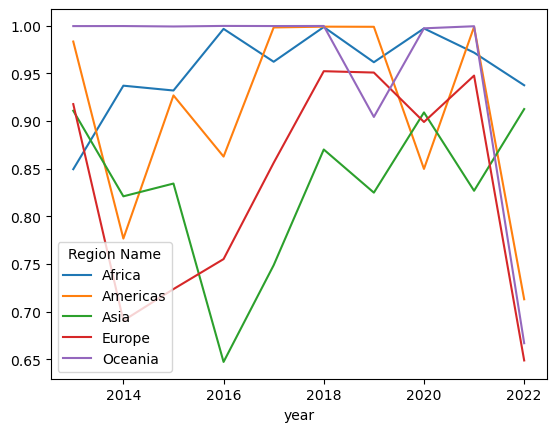

In [16]:
df1.groupby(['Region Name', 'year']).mean()['sentiment'].unstack(level=0).iloc[:,:10].plot()

# Dataset per paragraph of speech

## Loading the cleaned data

In [17]:
speeches2 = pd.read_parquet("https://github.com/Mlad-en/Intro_Data_Science/raw/main/cleaned_data/combined_data_2013_2022_per_paragraph.parquet")

In [18]:
speeches2

,country_name,iso_3,Region,corruption_sources,year,corruption_scores,corruption_standard_errors,global_score,fos_yearly_evolution,text_split
index,,,,,,,,,,
0,Afghanistan,AFG,AP,3.0,2013,8.0,3.0,62.64,0.00,Afghanistan. I therefore think that it is usef...
0,Afghanistan,AFG,AP,3.0,2013,8.0,3.0,62.64,0.00,I should like to share two contrasting picture...
0,Afghanistan,AFG,AP,3.0,2013,8.0,3.0,62.64,0.00,"States-led international military coalition, t..."
0,Afghanistan,AFG,AP,3.0,2013,8.0,3.0,62.64,0.00,Exploiting the vacuum and internal strife crea...
0,Afghanistan,AFG,AP,3.0,2013,8.0,3.0,62.64,0.00,Taliban regime until the 9/11 terrorist attack...
...,...,...,...,...,...,...,...,...,...,...
1941,Zambia,ZMB,SSA,9.0,2021,33.0,9.0,61.79,-1.21,"For us in Zambia, we will remain committed to ..."
1941,Zambia,ZMB,SSA,9.0,2021,33.0,9.0,61.79,-1.21,"Consistent with our commitment, Zambia is impl..."
1941,Zambia,ZMB,SSA,9.0,2021,33.0,9.0,61.79,-1.21,"In addition, Zambia emphasizes the importance ..."


## Combine with regions

In [19]:
df2 =  pd.merge(df_codes, speeches2, how="right", on="iso_3") 

In [20]:
df2

,Region Name,Sub-region Name,iso_3,country_name,Region,corruption_sources,year,corruption_scores,corruption_standard_errors,global_score,fos_yearly_evolution,text_split
0,Asia,Southern Asia,AFG,Afghanistan,AP,3.0,2013,8.0,3.0,62.64,0.00,Afghanistan. I therefore think that it is usef...
1,Asia,Southern Asia,AFG,Afghanistan,AP,3.0,2013,8.0,3.0,62.64,0.00,I should like to share two contrasting picture...
2,Asia,Southern Asia,AFG,Afghanistan,AP,3.0,2013,8.0,3.0,62.64,0.00,"States-led international military coalition, t..."
3,Asia,Southern Asia,AFG,Afghanistan,AP,3.0,2013,8.0,3.0,62.64,0.00,Exploiting the vacuum and internal strife crea...
4,Asia,Southern Asia,AFG,Afghanistan,AP,3.0,2013,8.0,3.0,62.64,0.00,Taliban regime until the 9/11 terrorist attack...
...,...,...,...,...,...,...,...,...,...,...,...,...
41304,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,9.0,2021,33.0,9.0,61.79,-1.21,"For us in Zambia, we will remain committed to ..."
41305,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,9.0,2021,33.0,9.0,61.79,-1.21,"Consistent with our commitment, Zambia is impl..."
41306,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,9.0,2021,33.0,9.0,61.79,-1.21,"In addition, Zambia emphasizes the importance ..."
41307,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,9.0,2021,33.0,9.0,61.79,-1.21,I wish to stress that the Government of the Re...


## Sentiment analyzer

### Drop None values of text

In [21]:
df2 = df2[df2['text_split'].notna()]

### Add sentiment score

In [22]:
df2['sentiment'] = [sia.polarity_scores(speech)['compound'] for speech in df2['text_split']]

/var/folders/2d/vrxk2jnd1z36wv_sfs69c0b00000gn/T/ipykernel_65216/2217622538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['sentiment'] = [sia.polarity_scores(speech)['compound'] for speech in df2['text_split']]


In [23]:
df2

,Region Name,Sub-region Name,iso_3,country_name,Region,corruption_sources,year,corruption_scores,corruption_standard_errors,global_score,fos_yearly_evolution,text_split,sentiment
0,Asia,Southern Asia,AFG,Afghanistan,AP,3.0,2013,8.0,3.0,62.64,0.00,Afghanistan. I therefore think that it is usef...,0.9803
1,Asia,Southern Asia,AFG,Afghanistan,AP,3.0,2013,8.0,3.0,62.64,0.00,I should like to share two contrasting picture...,0.5267
2,Asia,Southern Asia,AFG,Afghanistan,AP,3.0,2013,8.0,3.0,62.64,0.00,"States-led international military coalition, t...",-0.9716
3,Asia,Southern Asia,AFG,Afghanistan,AP,3.0,2013,8.0,3.0,62.64,0.00,Exploiting the vacuum and internal strife crea...,-0.9595
4,Asia,Southern Asia,AFG,Afghanistan,AP,3.0,2013,8.0,3.0,62.64,0.00,Taliban regime until the 9/11 terrorist attack...,-0.8225
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41304,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,9.0,2021,33.0,9.0,61.79,-1.21,"For us in Zambia, we will remain committed to ...",0.9245
41305,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,9.0,2021,33.0,9.0,61.79,-1.21,"Consistent with our commitment, Zambia is impl...",0.0000
41306,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,9.0,2021,33.0,9.0,61.79,-1.21,"In addition, Zambia emphasizes the importance ...",0.9100
41307,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,9.0,2021,33.0,9.0,61.79,-1.21,I wish to stress that the Government of the Re...,0.7351


### Very small analysis

/var/folders/2d/vrxk2jnd1z36wv_sfs69c0b00000gn/T/ipykernel_65216/2372745428.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby(['Region Name', 'year']).mean()['sentiment'].unstack(level=0).iloc[:,:10].plot()


<Axes: xlabel='year'>

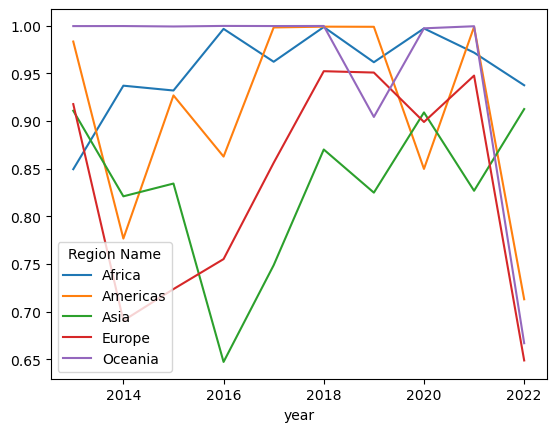

In [24]:
df1.groupby(['Region Name', 'year']).mean()['sentiment'].unstack(level=0).iloc[:,:10].plot()

# Save dataframes

In [25]:
df1.to_parquet('Sentiment_data.parquet')

In [26]:
df2.to_parquet('Sentiment_data_per_paragraph.parquet')

# Exploratory Data Analysis (EDA)

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring the data: "To what extent can the press freedom score of a country say something about the sentiment of speeches during the UN General Debate?"

In this part we will perform exploratory analysis based on our exploratory research question as states above. 

First we will examine the correlations between the level of sentiment over the years and the corruption scores / global scores. 

### Sentiment & Corruption

Lets see the correlations between sentiment score and corruption score when we use DF2:

In [31]:
# Group by country_name and year, calculate mean sentiment score
grouped_sentiment_data = df2.groupby(['country_name', 'year'])['sentiment'].mean().reset_index()

# DataFrame with mean sentiment score for each country and year
grouped_sentiment_data.head()

,country_name,year,sentiment
0,Afghanistan,2013,0.433078
1,Afghanistan,2014,0.303645
2,Afghanistan,2015,0.200063
3,Afghanistan,2016,0.280916
4,Afghanistan,2017,0.030567


In [32]:
# Group by country_name and year, calculate mean corruption score
grouped_corruption_data = df2.groupby(['country_name', 'year'])['corruption_scores'].mean().reset_index()

# DataFrame with mean corruption score for each country and year
grouped_corruption_data.head()

,country_name,year,corruption_scores
0,Afghanistan,2013,8.0
1,Afghanistan,2014,12.0
2,Afghanistan,2015,11.0
3,Afghanistan,2016,15.0
4,Afghanistan,2017,15.0


In [33]:
# Merge DataFrames on 'country_name' and 'year'
merged_df = pd.merge(grouped_sentiment_data, grouped_corruption_data, on=['country_name', 'year'])
merged_df.head()

,country_name,year,sentiment,corruption_scores
0,Afghanistan,2013,0.433078,8.0
1,Afghanistan,2014,0.303645,12.0
2,Afghanistan,2015,0.200063,11.0
3,Afghanistan,2016,0.280916,15.0
4,Afghanistan,2017,0.030567,15.0


In [34]:
# Calculate overall correlation
correlation = merged_df['sentiment'].corr(merged_df['corruption_scores'])
correlation

-0.038598616430599676

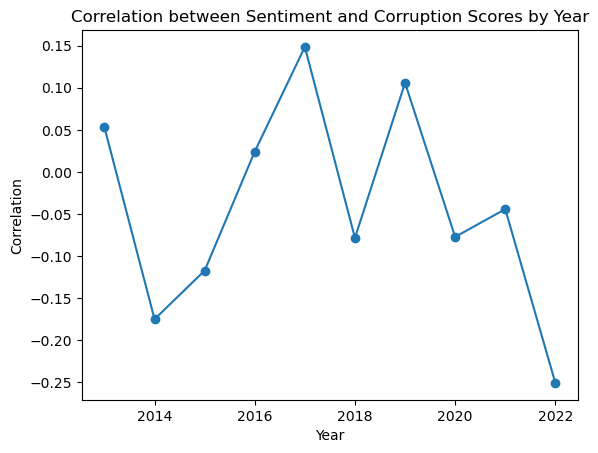

In [35]:
# Calculate correlation for each year
correlations_by_year = merged_df.groupby('year')[['sentiment', 'corruption_scores']].corr().iloc[0::2,-1].reset_index()
correlations_by_year.rename(columns={'corruption_scores': 'correlation'}, inplace=True)

# Plotting correlation development over the years
plt.plot(correlations_by_year['year'], correlations_by_year['correlation'], marker='o')
plt.xlabel('Year')
plt.ylabel('Correlation')
plt.title('Correlation between Sentiment and Corruption Scores by Year')
plt.show()

In [36]:
# Print the correlation values for each year
print("Correlation between Sentiment and Corruption Scores by Year:")
print(correlations_by_year)

Correlation between Sentiment and Corruption Scores by Year:
   year    level_1  correlation
0  2013  sentiment     0.052919
1  2014  sentiment    -0.174937
2  2015  sentiment    -0.117193
3  2016  sentiment     0.024189
4  2017  sentiment     0.148482
5  2018  sentiment    -0.078342
6  2019  sentiment     0.105828
7  2020  sentiment    -0.077216
8  2021  sentiment    -0.044192
9  2022  sentiment    -0.250632


### 2.2. Sentiment & Global FOP Scores

In [37]:
# DataFrame with mean sentiment score for each country and year
grouped_sentiment_data.head()

,country_name,year,sentiment
0,Afghanistan,2013,0.433078
1,Afghanistan,2014,0.303645
2,Afghanistan,2015,0.200063
3,Afghanistan,2016,0.280916
4,Afghanistan,2017,0.030567


In [38]:
# Group by country_name and year, calculate mean Global FOP score
grouped_FOP_data = df2.groupby(['country_name', 'year'])['global_score'].mean().reset_index()

# DataFrame with mean Global FOP score for each country and year
grouped_FOP_data.head()

,country_name,year,global_score
0,Afghanistan,2013,62.64
1,Afghanistan,2014,62.93
2,Afghanistan,2015,62.56
3,Afghanistan,2016,62.25
4,Afghanistan,2017,60.54


In [39]:
# Merge DataFrames on 'country_name' and 'year'
merged_df2 = pd.merge(grouped_sentiment_data, grouped_FOP_data, on=['country_name', 'year'])
merged_df2.head()

,country_name,year,sentiment,global_score
0,Afghanistan,2013,0.433078,62.64
1,Afghanistan,2014,0.303645,62.93
2,Afghanistan,2015,0.200063,62.56
3,Afghanistan,2016,0.280916,62.25
4,Afghanistan,2017,0.030567,60.54


In [40]:
# Calculate overall correlation
correlation = merged_df2['sentiment'].corr(merged_df2['global_score'])
correlation

0.0339289171612987

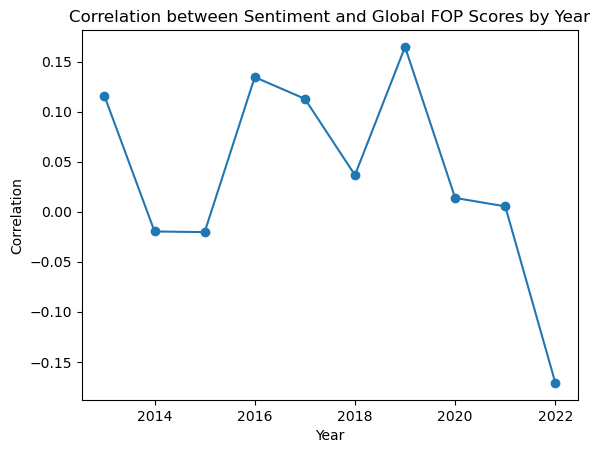

In [41]:
# Calculate correlation for each year
correlations_by_year2 = merged_df2.groupby('year')[['sentiment', 'global_score']].corr().iloc[0::2,-1].reset_index()
correlations_by_year2.rename(columns={'global_score': 'correlation'}, inplace=True)

# Plotting
plt.plot(correlations_by_year2['year'], correlations_by_year2['correlation'], marker='o')
plt.xlabel('Year')
plt.ylabel('Correlation')
plt.title('Correlation between Sentiment and Global FOP Scores by Year')
plt.show()

In [42]:
# Print the correlation values for each year
print("Correlation between Sentiment and Global FOP Scores by Year:")
print(correlations_by_year2)

Correlation between Sentiment and Global FOP Scores by Year:
   year    level_1  correlation
0  2013  sentiment     0.115643
1  2014  sentiment    -0.019771
2  2015  sentiment    -0.020396
3  2016  sentiment     0.134437
4  2017  sentiment     0.112770
5  2018  sentiment     0.036572
6  2019  sentiment     0.164622
7  2020  sentiment     0.013751
8  2021  sentiment     0.005306
9  2022  sentiment    -0.171102


## Interpreting the Results

As we can observe from the outputs above, the overall correlation between the sentiment score and the global FOP score seems to be positive, indicating some kind of positive relationship (if the sentiment score rises over the years, then the FOP score does so as well). However, this correlation is 0.034, which is still very low. If we can say anything about the relationship with this score is hence uncertain. Perhaps more exploratory analysis is required to study the relationship between these variables. 

However, if we see the development of the correlations over the years, we definetely can see variations. For instance, in the year 2022, the sentiment score and corruption score have a negative correlation of -0.25, and in 2019, the sentiment and Global FOP score had a positive correlation of 0.16. Why could this be the case? 